# Project – Heart Disease

## Problem Statement:
You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

## Domain: 
Healthcare

# Tasks To Be Performed:

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

## 1. Data Analysis:
- a. Import the dataset
- b. Get information about the dataset (mean, max, min, quartiles etc.)
- c. Find the correlation between all fields

In [212]:
# a. Import the dataset
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [214]:
# b. Get information about the dataset (mean, max, min, quartiles etc.)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [215]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [216]:
# c. Find the correlation between all fields
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# 2. Data Visualization:
- a. Visualize the number of patients having a heart disease and not having a heart disease
- b. Visualize the age and whether a patient has disease or not
- c. Visualize correlation between all features using a heat map

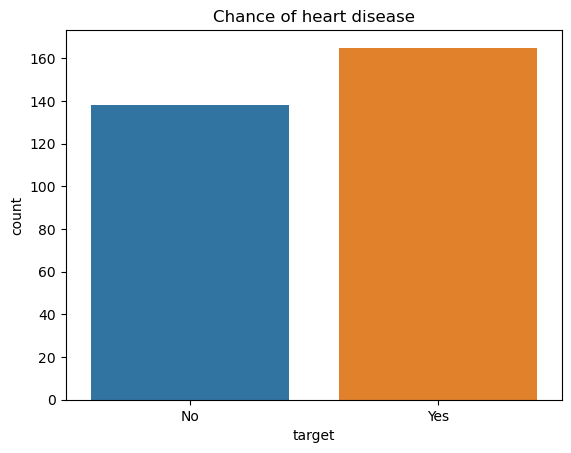

In [217]:
# a. Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(data=df, x='target')
plt.title("Chance of heart disease")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

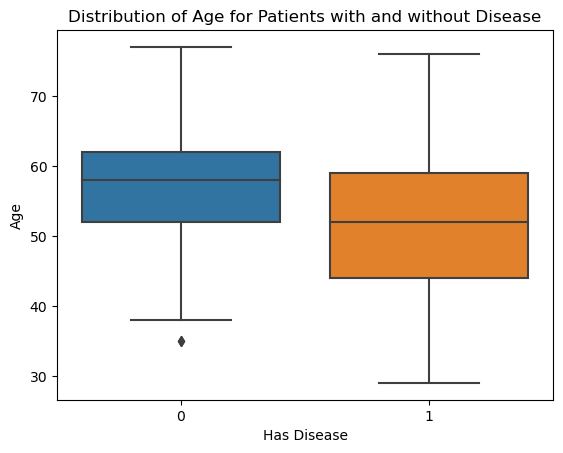

In [218]:
# b. Visualize the age and whether a patient has disease or not
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('Has Disease')
plt.ylabel('Age')
plt.title('Distribution of Age for Patients with and without Disease')
plt.show()

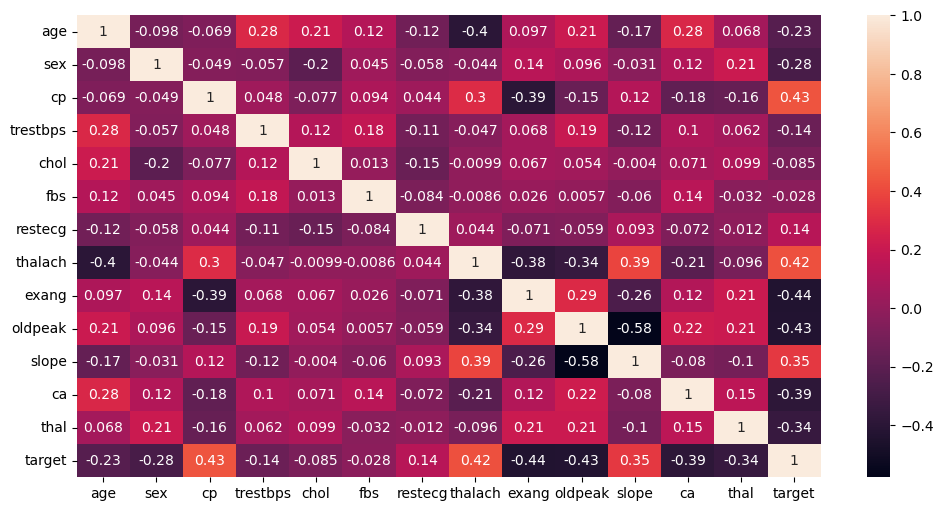

In [219]:
# c. Visualize correlation between all features using a heat map
plt.subplots(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

---
## Creating models

### VIF

In [220]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

     feature        VIF
0        age  38.998305
1        sex   3.523211
2         cp   2.414403
3   trestbps  58.557335
4       chol  26.267365
5        fbs   1.268205
6    restecg   2.058206
7    thalach  42.742178
8      exang   2.022527
9    oldpeak   3.062890
10     slope  10.072734
11        ca   1.808925
12      thal  17.165303


In [221]:
df.drop(columns=['trestbps'], inplace=True)

In [222]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature        VIF
0       age  28.599796
1       sex   3.522376
2        cp   2.403644
3      chol  25.923434
4       fbs   1.250256
5   restecg   2.058206
6   thalach  34.026519
7     exang   1.990878
8   oldpeak   2.973430
9     slope  10.067190
10       ca   1.808102
11     thal  17.005949


In [223]:
df.drop(columns=['thalach'], inplace=True)

In [224]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature        VIF
0       age  27.213596
1       sex   3.412645
2        cp   2.264790
3      chol  22.374105
4       fbs   1.248307
5   restecg   2.022210
6     exang   1.955987
7   oldpeak   2.965697
8     slope   8.372679
9        ca   1.760648
10     thal  15.963052


In [225]:
df.drop(columns=['age'], inplace=True)

In [226]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature        VIF
0      sex   3.404301
1       cp   2.211674
2     chol  14.917083
3      fbs   1.232428
4  restecg   2.006017
5    exang   1.947640
6  oldpeak   2.827322
7    slope   7.983150
8       ca   1.710828
9     thal  14.860553


In [227]:
df.drop(columns=['chol'], inplace=True)

In [228]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature        VIF
0      sex   3.348022
1       cp   2.154649
2      fbs   1.223893
3  restecg   2.005247
4    exang   1.915642
5  oldpeak   2.628953
6    slope   6.201591
7       ca   1.707658
8     thal  10.478889


In [229]:
df.drop(columns=['thal'], inplace=True)

In [230]:
col_list = []
for col in df.columns:
    if((df[col].dtype!='object')&(col!='target')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature       VIF
0      sex  3.038525
1       cp  2.112149
2      fbs  1.222870
3  restecg  1.957971
4    exang  1.795800
5  oldpeak  2.062440
6    slope  3.756703
7       ca  1.686170



## 3. Logistic Regression:

### a. Build a simple logistic regression model:
- i. Divide the dataset in 70:30 ratio
- ii. Build the model on train set and predict the values on test set
- iii. Build the confusion matrix and get the accuracy score

In [231]:
X = df.drop('target', axis=1)
y = df['target']

In [232]:
# i. Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [233]:
# ii. Build the model on train set and predict the values on test set
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [234]:
y_pred_lr = LR.predict(X_test)

In [235]:
# iii. Build the confusion matrix and get the accuracy score
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_lr))
print('Accuracy Score ', accuracy_score(y_test, y_pred_lr))

Confusion Matrix:
 [[30 14]
 [ 7 40]]
Accuracy Score  0.7692307692307693


## 5. Random Forest:

### a. Build a Random Forest model:
- i. Divide the dataset in 70:30 ratio
- ii. Build the model on train set and predict the values on test set
- iii. Build the confusion matrix and calculate the accuracy
- iv. Visualize the model using the Graphviz package

In [236]:
# i. Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [237]:
# ii. Build the model on train set and predict the values on test set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [238]:
y_pred_rf = rf.predict(X_test)

In [239]:
# iii. Build the confusion matrix and calculate the accuracy
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score ', accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[31 13]
 [ 6 41]]
Accuracy Score  0.7912087912087912


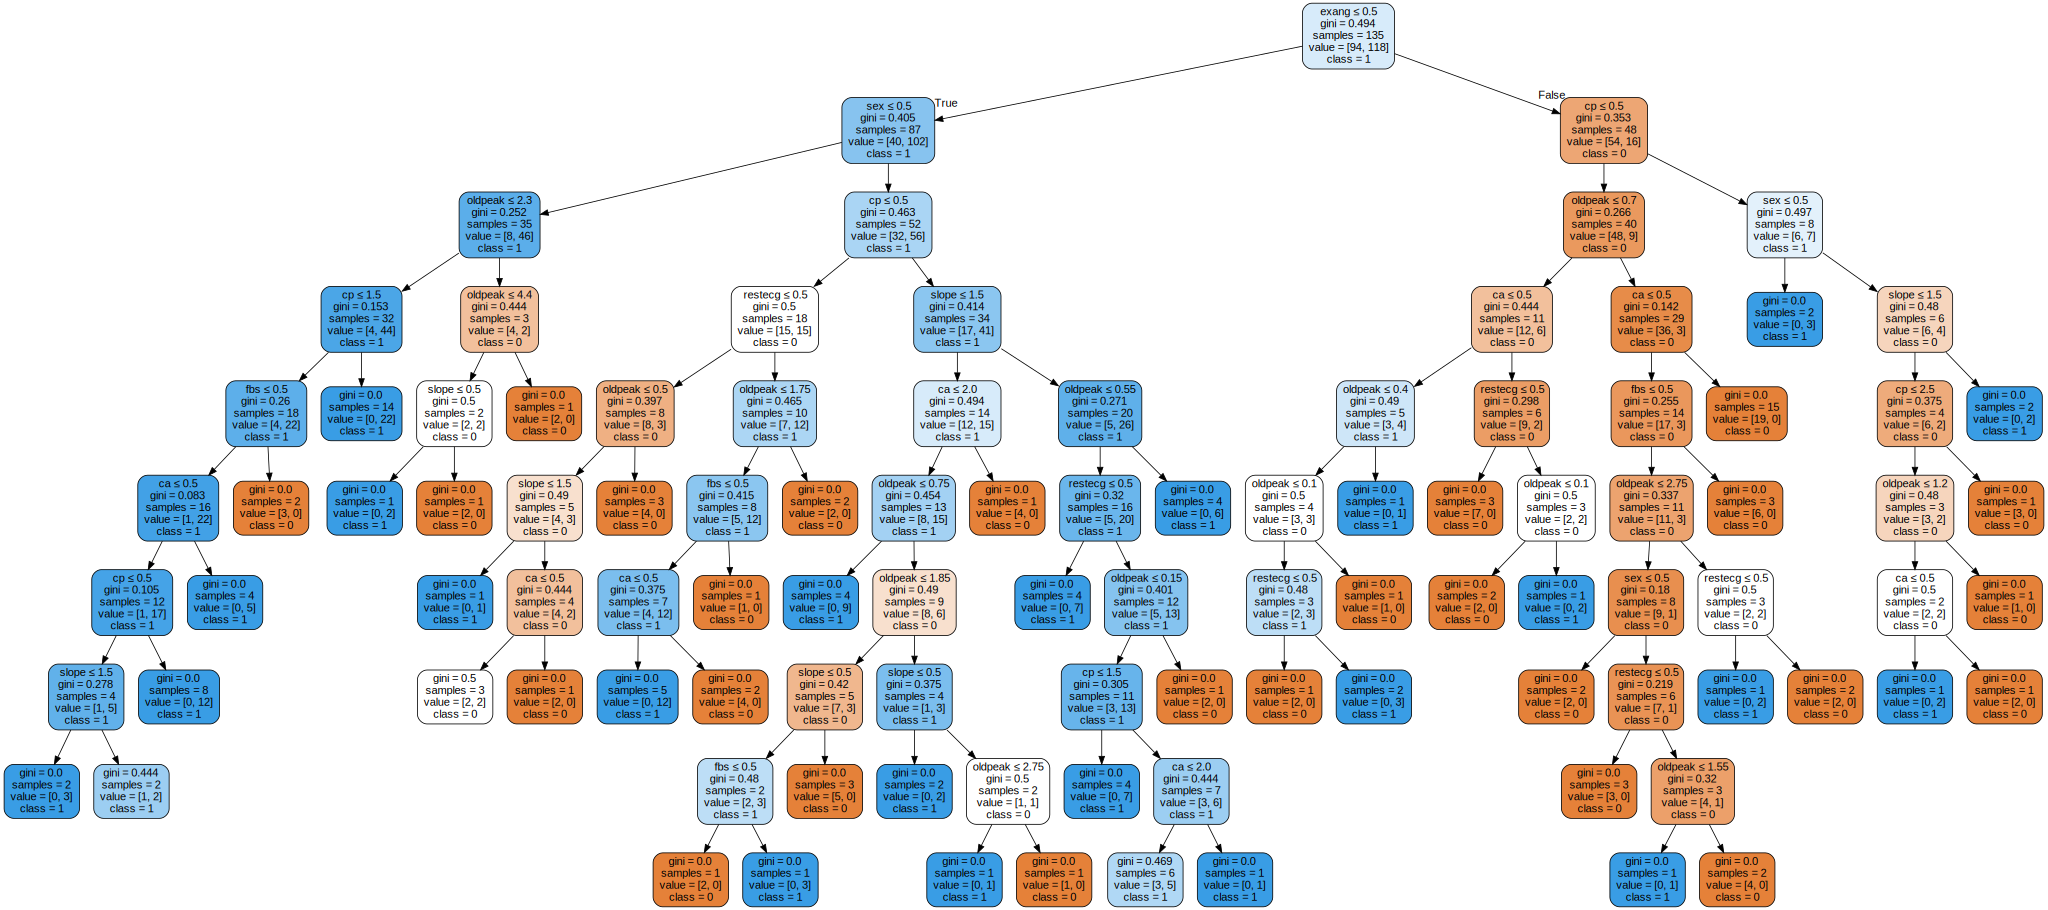

In [250]:
# iv. Visualize the model using the Graphviz package

estimator = rf.estimators_[0]

# Export the decision tree to DOT format
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

# Use Graphviz to render the decision tree
graph = graphviz.Source(dot_data, format='png')
graph.render('decision_tree', format='png', cleanup=True, quiet=True)
display(graph)

## 6. Select the best model
- a. Print the confusion matrix of all classifiers
- b. Print the classification report of all classifiers
- c. Calculate Recall Precision and F1 score of all the models
- d. Visualize confusion matrix using heatmaps
- e. Select the best model based on the best accuracies

In [241]:
# a. Print the confusion matrix of all classifiers
print('Confusion Matrix of Logistic Regression:\n',confusion_matrix(y_test, y_pred_lr))
print('Confusion Matrix of Random Forest:\n',confusion_matrix(y_test, y_pred_rf))

Confusion Matrix of Logistic Regression:
 [[30 14]
 [ 7 40]]
Confusion Matrix of Random Forest:
 [[31 13]
 [ 6 41]]


In [242]:
# b. Print the classification report of all classifiers
print('Classification Report of Logistic Regression:\n', classification_report(y_test, y_pred_lr))
print('Classification Report of Random Forest:\n', classification_report(y_test, y_pred_rf))

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.74      0.85      0.79        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77        44
           1       0.76      0.87      0.81        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



In [243]:
# c. Calculate Recall Precision and F1 score of all the models
print('Recall Score of Logistic Regression:', recall_score(y_test, y_pred_lr))
print('F1 Score of Logistic Regression:', f1_score(y_test, y_pred_lr))
print()
print('Recall Score of Random Forest:', recall_score(y_test, y_pred_rf))
print('F1 Score of Random Forest:', f1_score(y_test, y_pred_rf))

Recall Score of Logistic Regression: 0.851063829787234
F1 Score of Logistic Regression: 0.7920792079207921

Recall Score of Random Forest: 0.8723404255319149
F1 Score of Random Forest: 0.8118811881188118


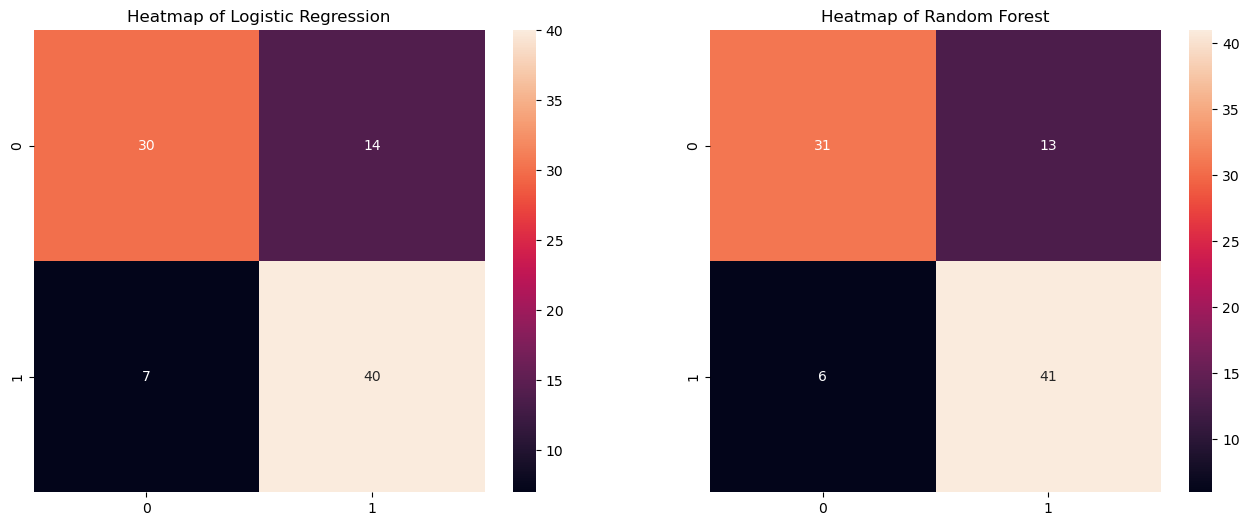

In [244]:
# d. Visualize confusion matrix using heatmaps
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True)
plt.title("Heatmap of Logistic Regression")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title("Heatmap of Random Forest")
plt.show()

In [245]:
# e. Select the best model based on the best accuracies
print('Accuracy Score of Logistic Regression:', accuracy_score(y_test, y_pred_lr))
print('Accuracy Score of Random Forest:', accuracy_score(y_test, y_pred_rf))

Accuracy Score of Logistic Regression: 0.7692307692307693
Accuracy Score of Random Forest: 0.7912087912087912


# Conclusion

**Random Forest** is slightly more accurate than Logistic Regression